In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge line

The Pacific Dataviz Challenge is a competition for all—of any age, background or skillset—that encourages storytelling, design, innovation and technical skill in the visualisation of Pacific data.

Participants, individually or as a team, are invited to create data visualisations that highlight important issues or opportunities facing the Pacific region.

Your submission could be an infographic, animation, dashboard, web app, poster, PDF report, drawing—almost anything you can imagine and create.

# Theme (taken directly from site)

This year’s theme ‘Blue Pacific 2050’ references the long-term approach to working together as a region, the 2050 Strategy for the Blue Pacific Continent.

A shared vision, it shaped by and for Pacific peoples, cultures, and their deep connection to the land and ocean.

The Strategy focuses on seven key areas:

1. Political Leadership and Regionalism
2. People-Centred Development
3. Peace and Security
4. Resources and Economic Development
5. Climate Change and Disasters
6. Ocean and Environment
7. Technology and Connectivity.

# Exploration

In [2]:
all_df = pd.read_csv("../data/bp2050_all.csv")
ppl_df = pd.read_csv("../data/bp2050_ppl_centered_dev.csv")

## Investigative notes

- There's a mapping which I can't fully find on the site but it's much easier to understand and navigate in tandem with the datahubs UI
- Columns like `DATAFLOW` and `FREQ` probably aren't relevant for this shorter analysis and challenge

### Noted Mappings:

`_T` indicates Total and `_Z` means "Not stated" (or the equivalent)

- `GEO_PICT`: are the individual Pacific Island Countries and Territories
    - 'FM': Micronesia
    - 'TV': Tuvalu
    - 'NR': Nauru
    - 'VU': Vanuatu
    - 'PW': Palau
    - 'TO': Tonga
    - 'MH': Mashall Islands
    - 'CK': Cook Islands
    - 'PG': Papua New Guinea
    - 'WS':
    - 'KI': Kiribati
    - 'SB':
    - 'FJ': Fiji
    - 'PF': French Polynesia
    - 'NU': Niue
    - 'NC': New caledonia
- `SEX`:
    - '_T': Total
    - 'F': Female
    - 'M': Male
- `AGE`: Provided as ranges (`Y` = start of range and `T` = end of range)
- `URBANIZATION`:
    - '_T': Total
    - 'U': Urban
    - 'R': Rural
- `INCOME`: Denotes quintiles, bottom 40\%, and top 60\%
- `EDUCATION`: Specific range based on entry
- `OCCUPATION`: Specific mapping based on entry
- `COMPOSITE_BREAKDOWN`: Special groups based on theme

# Area of Interest

Discussion around safe water, sanitation, and hygeine at the national level

Indicator mappings (gathered via manual checking and validation)

- `SH_H2O_IMPR`: Population using an improved drinking water source
- `SH_MED_DEN`: Health worker density
- `SH_STA_WASH`: Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene
- `BPI_MANAF5`: Healthy food policies in schools
- `SE_ACS_H2O`: Proportion of schools with access to basic drinking water
- `SH_SAN_SAFE`: Proportion of population using safely managed sanitation services
- `SPC_6_3_1`: Proportion of wastewater safely treated

Occupation mappings

- `221`: Medical Doctors
- `2261`: Dentists
- `222`: Nursing and Midwifery Professionals
- `2221`: Nursing Professionals
- `2262`: Pharmacists
- `2222`: Midwifery Professionals

In [3]:
# target_df = pd.read_csv("../data/filtered_water_data_theme_2.csv")
target_inds = {
    # "SH_H2O_IMPR": "Population using an improved drinking water source",
    "SH_MED_DEN": "Health worker density",
    # "SH_STA_WASH": "Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene",
    # "BPI_MANAF5": "Healthy food policies in schools",
    # "SE_ACS_H2O": "Proportion of schools with access to basic drinking water",
    # "SH_SAN_SAFE": "Proportion of population using safely managed sanitation services",
    # "SPC_6_3_1": "Proportion of wastewater safely treated",
    "SPC_3_8_1": "Coverage of essential health services"
}
target_geo = [
    "CK",
    "NC",
    "PF",
    "WS",
    "PW",
    "FJ"
]

target_df = ppl_df[
    (ppl_df["INDICATOR"].isin(target_inds.keys())) & 
    (ppl_df["GEO_PICT"].isin(target_geo)) & 
    (ppl_df["URBANIZATION"] == '_T') &
    (ppl_df["TIME_PERIOD"] >= 2010) &
    (ppl_df["TIME_PERIOD"] <= 2021)
    ][
        [
            "INDICATOR",
            "COMPOSITE_BREAKDOWN",
            "GEO_PICT",
            "SEX",
            "AGE",
            "URBANIZATION",
            "INCOME",
            "OCCUPATION",
            "REPORTING_TYPE",
            "NATURE",
            "TIME_PERIOD",
            "OBS_VALUE",
            "UNIT_MEASURE"
        ]
    ]

In [4]:
target_df \
    .dropna(subset=["OBS_VALUE"]) \
    .sort_values(by=["GEO_PICT","TIME_PERIOD"]) \
    .head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
5304,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2010,60.71,INDEX
7658,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2013,61.36,PER_10000_POP
180,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2014,14.29,PER_10000_POP
4538,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2261,G,_X,2014,12.57,PER_10000_POP
7659,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2014,66.29,PER_10000_POP
9749,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2262,G,_X,2014,0.57,PER_10000_POP
5305,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2015,63.45,INDEX
7660,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2015,68.97,PER_10000_POP
7661,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2016,71.10,PER_10000_POP
5306,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2017,62.52,INDEX


In [5]:
measures = [
    "GEO_PICT",
    "SEX",
    "AGE",
    "URBANIZATION",
    "INCOME",
    "OCCUPATION",
    "UNIT_MEASURE",
    "REPORTING_TYPE",
    "NATURE",
    "TIME_PERIOD",
]
for ind, val in target_inds.items():
    print("*"*5,ind,": ",val,"*"*5)
    for measure in measures:
        print("\t",measure,": ",pd.unique(target_df[target_df["INDICATOR"]==ind][measure]))

***** SH_MED_DEN :  Health worker density *****
	 GEO_PICT :  ['CK' 'NC' 'PF' 'WS' 'PW' 'FJ']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['221' '2261' '2262' '2221' '222' '2222']
	 UNIT_MEASURE :  ['PER_10000_POP' 'PER_1000_POP']
	 REPORTING_TYPE :  ['G' 'N']
	 NATURE :  ['_X' 'C']
	 TIME_PERIOD :  [2014 2019 2020 2010 2011 2012 2013 2015 2016 2017 2018 2021]
***** SPC_3_8_1 :  Coverage of essential health services *****
	 GEO_PICT :  ['FJ' 'CK' 'PW' 'WS']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['_T']
	 UNIT_MEASURE :  ['INDEX']
	 REPORTING_TYPE :  ['G']
	 NATURE :  ['_X']
	 TIME_PERIOD :  [2010 2015 2017 2019 2021]


# Indicator-level Analyses

In [6]:
# mort_df = target_df[(target_df["INDICATOR"] == "SH_STA_WASH") & (target_df["UNIT_MEASURE"] == "PER_100000_POP")]
# avail_water_df = target_df[(target_df["INDICATOR"] == "SH_H2O_IMPR") & (target_df["UNIT_MEASURE"] == "RATIO_POP")]
# waste_water_df = target_df[(target_df["INDICATOR"] == "SPC_6_3_1") & (target_df["UNIT_MEASURE"] == "PERCENT")]
# food_pol_df = target_df[(target_df["INDICATOR"] == "BPI_MANAF5") & (target_df["UNIT_MEASURE"] == "N")]
# san_serv_df = target_df[(target_df["INDICATOR"] == "SH_SAN_SAFE") & (target_df["UNIT_MEASURE"] == "PERCENT")]
health_care_df_10000 = target_df[(target_df["INDICATOR"] == "SH_MED_DEN") & (target_df["UNIT_MEASURE"] == "PER_10000_POP")]
health_care_df_1000 = target_df[(target_df["INDICATOR"] == "SH_MED_DEN") & (target_df["UNIT_MEASURE"] == "PER_1000_POP")]
# school_h20_access_df = target_df[(target_df["INDICATOR"] == "SE_ACS_H2O") & (target_df["UNIT_MEASURE"] == "PERCENT")]
ess_hlth_df = target_df[(target_df["INDICATOR"] == "SPC_3_8_1") & (target_df["UNIT_MEASURE"] == "INDEX")]

# Healthcare Worker Density

In [7]:
health_care_df_10000.head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
180,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2014,14.29,PER_10000_POP
181,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2019,14.29,PER_10000_POP
182,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2020,16.67,PER_10000_POP
554,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2010,4.71,PER_10000_POP
555,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2011,4.52,PER_10000_POP
556,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2012,4.73,PER_10000_POP
557,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2013,4.77,PER_10000_POP
558,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2014,4.70,PER_10000_POP
559,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2015,4.64,PER_10000_POP
560,SH_MED_DEN,_Z,NC,_T,_T,_T,_T,2261,N,C,2016,4.56,PER_10000_POP


In [8]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs, xticklabels=True, yticklabels=True)

def normalize(df, feature_name):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)

occ_map = {
    "221": "Medical Doctors",
    "2261": "Dentists",
    "222": "Nursing and Midwifery Professionals",
    "2221": "Nursing and Midwifery Professionals",
    "2262": "Pharmacists",
    "2222": "Nursing and Midwifery Professionals"
}

In [9]:
data = health_care_df_10000[health_care_df_10000["TIME_PERIOD"] >= 2010][["GEO_PICT","OCCUPATION","TIME_PERIOD","OBS_VALUE"]]
data = data.replace({"OCCUPATION": occ_map})

geo = pd.unique(data["GEO_PICT"])
occ = pd.unique(data["OCCUPATION"])
year = pd.unique(data["TIME_PERIOD"])

mi = pd.MultiIndex.from_product([geo, occ, year])
grouped = data.groupby(["GEO_PICT", "OCCUPATION", "TIME_PERIOD"])["OBS_VALUE"].sum()
data = grouped \
    .reindex(mi, fill_value=pd.NA) \
    .to_frame() \
    .reset_index() \
    .rename(
        columns={
            "level_0": "GEO_PICT", 
            "level_1": "OCCUPATION", 
            "level_2": "TIME_PERIOD"
        }
    )

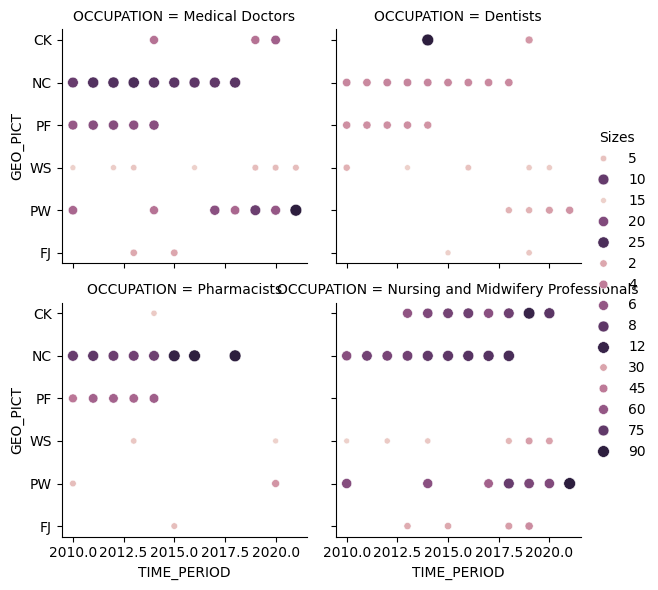

In [10]:
# # Multi-heatmap option
# g = sns.FacetGrid(data, col="OCCUPATION", col_wrap = 1)
# g.map_dataframe(draw_heatmap, "TIME_PERIOD", "GEO_PICT", "NORMALIZED_OBS")

g = sns.FacetGrid(data, col="OCCUPATION", col_wrap = 2)
g.map_dataframe(
    sns.scatterplot, 
    x="TIME_PERIOD", 
    y="GEO_PICT",
    hue="OBS_VALUE",
    size="OBS_VALUE"
)
g.add_legend(title='Sizes')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 


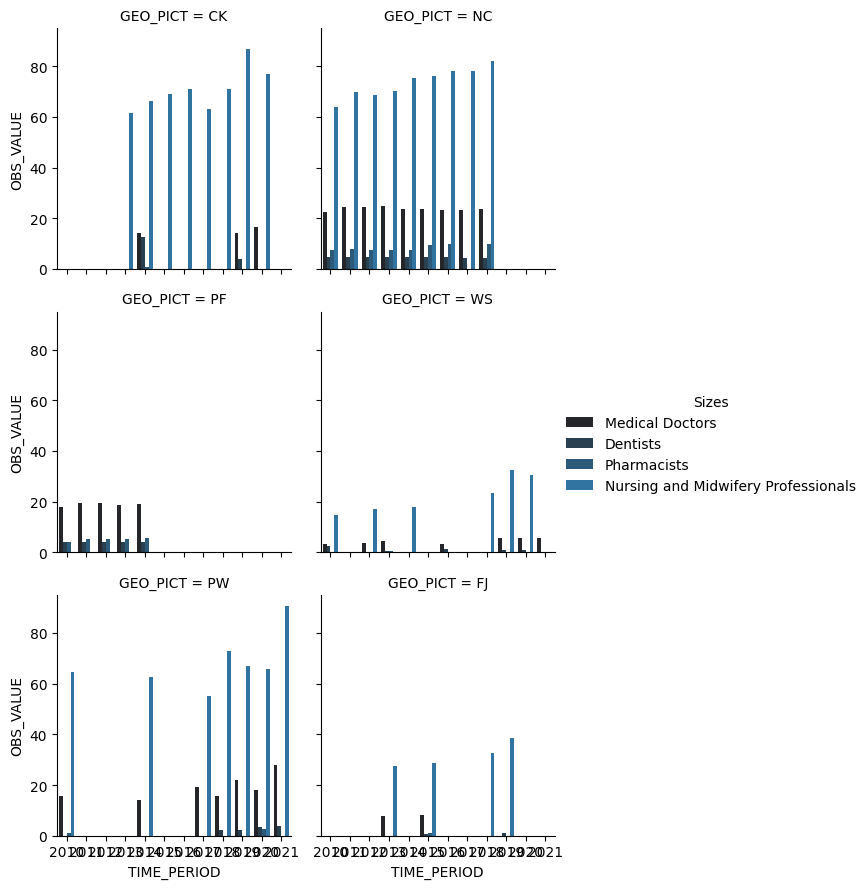

In [11]:
g = sns.FacetGrid(data, col="GEO_PICT", col_wrap = 2)
g.map_dataframe(
    sns.barplot, 
    x="TIME_PERIOD", 
    y="OBS_VALUE",
    hue="OCCUPATION"
)
g.add_legend(title='Sizes')

<Axes: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

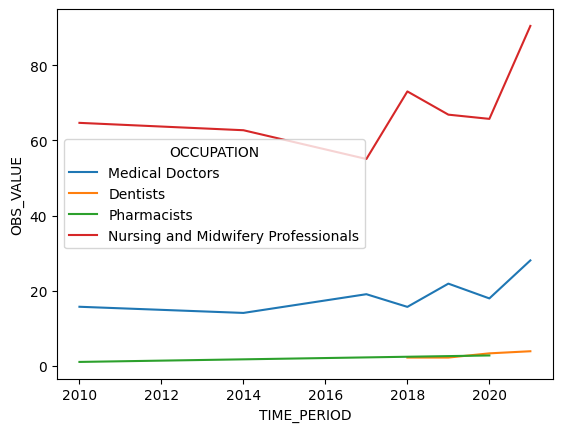

In [12]:
sns.lineplot( 
    data=data[data["GEO_PICT"] == "PW"],
    x="TIME_PERIOD", 
    y="OBS_VALUE",
    hue="OCCUPATION"
)

## Coverage of essential health services

In [13]:
ess_hlth_df.sort_values(by=["GEO_PICT","OBS_VALUE"]).head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
5308,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2021,45.98,INDEX
5304,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2010,60.71,INDEX
5306,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2017,62.52,INDEX
5307,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2019,63.44,INDEX
5305,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2015,63.45,INDEX


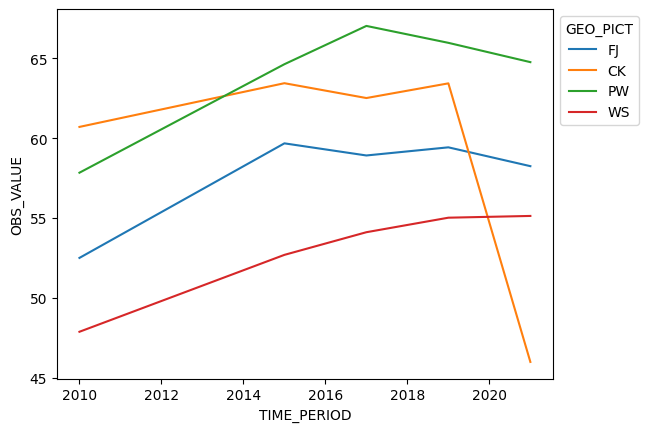

In [14]:
ax = sns.lineplot(
    data=ess_hlth_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))